2022-2024 open-meteo historical weather data for 4 NL locations



In [2]:
!pip install seaborn

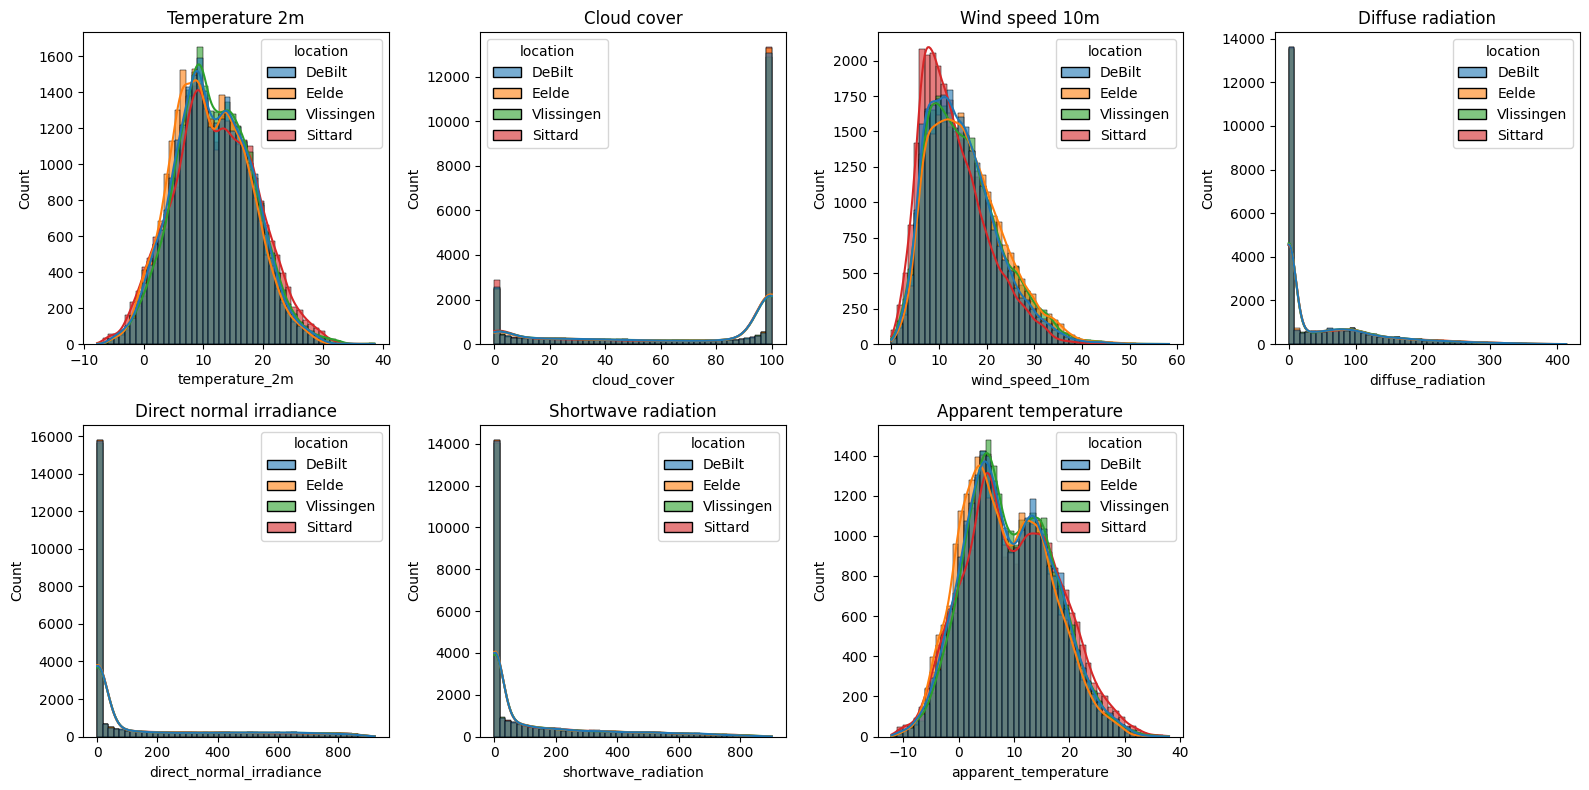

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update file path if needed)
df = pd.read_csv("../Data/hist_weather_data_2022-2024_2025-03-12T10-19-27+00-00.csv")

# Define the features to plot
features = [
    "temperature_2m", "cloud_cover", "wind_speed_10m", 
    "diffuse_radiation", "direct_normal_irradiance", 
    "shortwave_radiation", "apparent_temperature"
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

# Plot histograms with KDE for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(df, x=feature, hue="location", kde=True, bins=50, alpha=0.6, ax=ax)
    ax.set_title(feature.replace("_", " ").capitalize())

# Remove the last empty subplot if number of features is less than grid size
if len(features) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

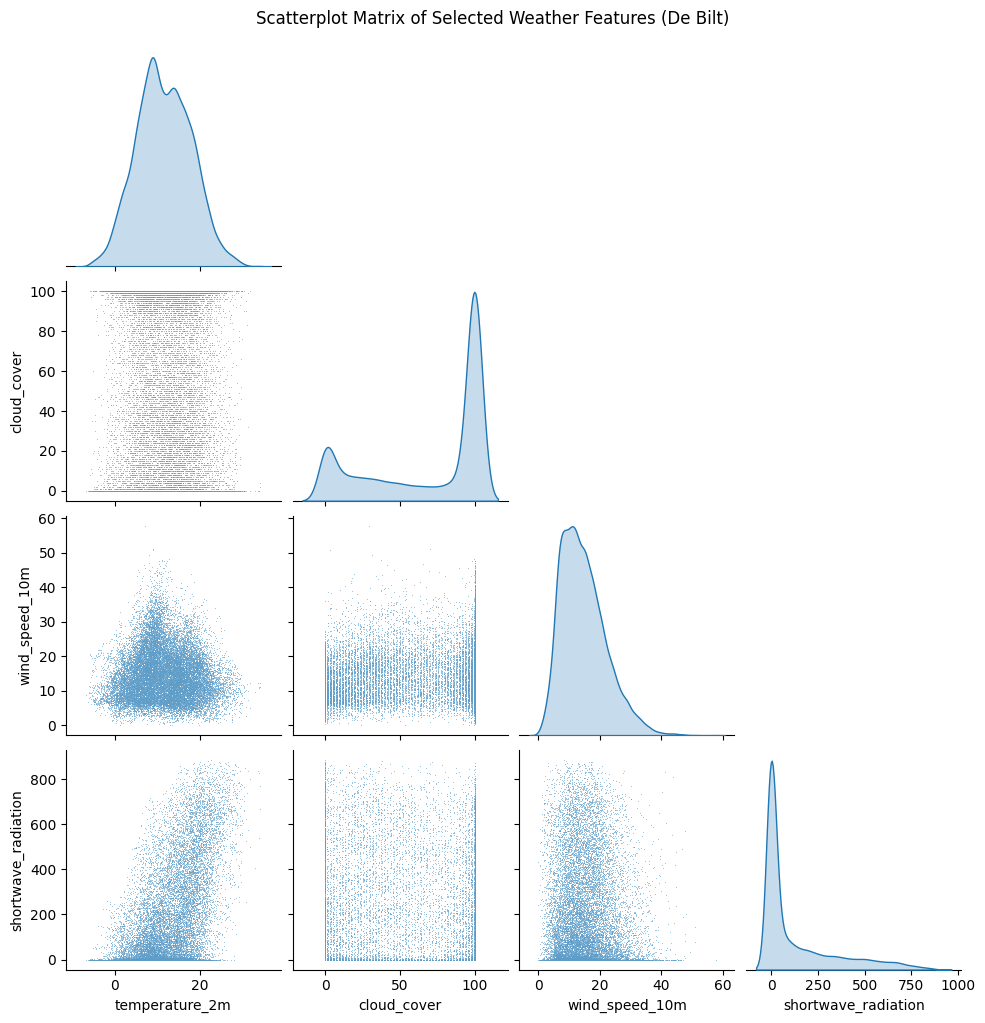

In [13]:
# Filter out the unwanted features
filtered_features = [feature for feature in features if feature not in ["apparent_temperature", "diffuse_radiation", "direct_normal_irradiance"]]

# Pair plot with KDE on diagonal and reduced dot size
sns.pairplot(df_debilt[filtered_features], diag_kind="kde", corner=True, plot_kws={'s': 1/3})

# Show the plot
plt.suptitle("Scatterplot Matrix of Selected Weather Features (De Bilt)", y=1.02)
plt.show()
